## This is a tutorial to demonstrate the basic functionalities of microscope-metrics

microscope-metrics is organized around the different types of samples. Samples are different types of standard samples that are imaged, under specific conditions to obtain information about the performance of the micrsocope. A sample may have different ways to be imaged and, therefore, analyzed.

Argolight slides contain a number of differet engraved fluorescent patterns that may be imaged. One of those patterns, the pattern E, contains lines that are separated by an increasing distance. The idea is to walk along those lines and, when you are able to separate them, that distance actually corresponds to the resolution power of your microscope. Neat, eh!

Well. Those lines may be oriented along the X axis, to measure the resolution in Y, of viceversa in Y to meassure the resolution in X.

Let's say we have an Arolight slide where we have imaged that pattern. First we have to import the specific analysis from the Argolight sample and instantiate it.

In [2]:
from microscopemetrics.samples.argolight import ArgolightEAnalysis

my_argolight_analysis = ArgolightEAnalysis()

Now we have to start to feed some data to our analysis. There are two types of data that the analysis requires. 
1. The actual intensity measurements from the microscope, that is the image, and 
2. the metadata. Some exptra information that the analysis needs in order to do a good job.

### Feeding data

Let's start feeding the data. The data is the image of the lines. This image must be fed as a numpy array with the dimensions in the order Z, C, T, Y, X. We happen to have one. Let's read it.

We will need to import Numpy to read the image

In [3]:
import numpy as np

image = np.load('../tests/data/201702_RI510_Argolight-1-1_004_SIR_ALX.npy')
image.shape

(26, 4, 1, 1024, 1024)

We can see that eh image has 26 planes in Z, 4 channels and is 1024 by 1024 in X and Y. 

So how does the image look like. We don't really have to look at it, but it is beautiful. Right?

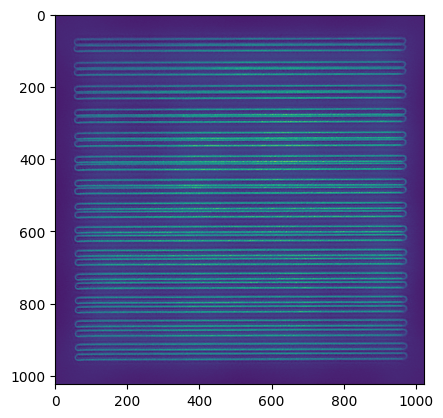

In [4]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(image[12,3, 0,...])

So we can see those lines now. In fact, the lines are actually double, like little tubes. You can see how they are closed at the ends. What we are actually interested in is the distances between the edges of the adyacent 'tubes'.

So let's give this image now to our analysis. 

### Feeding data
There are two types of "things" that we are going to feed our analysis. 
- Data, the actual image data and 
- Metadata, all teh rest of the information necesary for the analysis

So lets see what kind of data we need
The input data has to be in the form of a dictionary with the name of the image and the image itself.

In [5]:
my_argolight_analysis.describe_requirements()

DATA requirements:

----------
Name: argolight_e
Description: Input image in the form of a numpy array
Optional: False
----------

METADATA requirements:

----------
Name: pixel_size
Description: Physical size of the voxel in z, y and x
Optional: False
Units: MICRON
Default: None
----------
Name: axis
Description: axis along which resolution is being measured. 1=Y, 2=X
Optional: False
Units: None
Default: None
----------
Name: measured_band
Description: Fraction of the image across which intensity profiles are measured
Optional: True
Units: None
Default: 0.4
----------


For what is the data, we require the actual image that has to be named 'argolight_e'. We feed the data using set_data

In [6]:
my_argolight_analysis.set_data('argolight_e', image)

That's all for the data

### Feeding metadata
Now we need to provide some metadata for the analysis to run. How do we know this? Well, because if you try to run the analysis it is going to complain to you. Look what happens. Don't worry about how to run the analysis, we will go into that later on.

In [7]:
my_argolight_analysis.run()

Metadata requirements are not valid


False

You see? It complains and it returns False. So to say that the analysis did not run.

Let's ask now to the analysis what it needs

In [8]:
my_argolight_analysis.describe_requirements()

DATA requirements:

----------
Name: argolight_e
Description: Input image in the form of a numpy array
Optional: False
----------

METADATA requirements:

----------
Name: pixel_size
Description: Physical size of the voxel in z, y and x
Optional: False
Units: MICRON
Default: None
----------
Name: axis
Description: axis along which resolution is being measured. 1=Y, 2=X
Optional: False
Units: None
Default: None
----------
Name: measured_band
Description: Fraction of the image across which intensity profiles are measured
Optional: True
Units: None
Default: 0.4
----------


You see that the argolight_ data is filled and that it needs to know three things, for which one is optional.

Let's say we want to provide the pixel size. Let's check the units and feed the values with the method set_metadata

In [11]:
my_argolight_analysis.set_metadata('pixel_size', (.125, '.039', .039))

Let's verify now that that parameter is set properly

In [12]:
my_argolight_analysis.get_metadata_values('pixel_size')

(0.125, 0.039, 0.039)

And we can verify again the units

In [13]:
my_argolight_analysis.get_metadata_units('pixel_size')

'MICRON'

Are we set now? how can we check if we are ok to run the analysis?

In [15]:
my_argolight_analysis.validate_requirements()

False

It seeme we forgot something... but what?

In [16]:
my_argolight_analysis.list_unmet_requirements()

['axis']

Ah, yes! If we look back into the description we can see that this is abou the orientation of the lines. We might do this automatically one day, but for the moment we have to tell the analysis that the lines are vertical, that is we meassure the resolution in X, so value=2

In [17]:
my_argolight_analysis.set_metadata('axis', 1)

Are we good now?

In [18]:
my_argolight_analysis.validate_requirements()

True

Congratulations!

### Running the analysis

You are ready to run the analysis. You can do that through the run method.

In [19]:
my_argolight_analysis.run()

True

analysis.run() will return True when it is ready. 

### Exploring the output

We can now start to explore the output.

We have a general description of the output

In [20]:
my_argolight_analysis.output.description

'Analysis output of the lines (pattern E) from the argolight sample. It contains resolution data on the axis indicated:- axis 1 = Y resolution = lines along X axis- axis 2 = X resolution = lines along Y axis'

The output is organized as a dictionary of Outpur properties.

In [21]:
print(my_argolight_analysis.output.describe_properties())

Peaks_ch000
Name: Peaks_ch000
Type: Roi
Description: Lines where highest Rayleigh resolution was found in channel 0
Peaks_ch001
Name: Peaks_ch001
Type: Roi
Description: Lines where highest Rayleigh resolution was found in channel 1
Peaks_ch002
Name: Peaks_ch002
Type: Roi
Description: Lines where highest Rayleigh resolution was found in channel 2
Peaks_ch003
Name: Peaks_ch003
Type: Roi
Description: Lines where highest Rayleigh resolution was found in channel 3
Key-Value Annotations
Name: Key-Value Annotations
Type: KeyValues
Description: Measurements on Argolight E pattern along axis=1
Profiles
Name: Profiles
Type: Table
Description: Raw and fitted profiles across the center of the image along the defined axis



Now you have an idea of the different elements of the output. The type of output properties may be:
- a comment
- an image
- a roi: a roi is a combimation of shapes, and shapes may be:
    - a point
    - a rectangle
    - a line
    - an ellipse
    - and a polygon
    - and, in the near future, a mask
- a tag
- a key-value pair
- or a table

Let's have a look at the key-value annotations. Those are probably containing some of the measurements

In [22]:
my_argolight_analysis.output.properties["Key-Value Annotations"].key_values

{'ch00_rayleigh_resolution': 0.1756533129182712,
 'ch01_rayleigh_resolution': 0.16743571161420692,
 'ch02_rayleigh_resolution': 0.16304141455677643,
 'ch03_rayleigh_resolution': 0.18041622105522268,
 'resolution_units': 'MICRON',
 'resolution_axis': 1,
 'measured_band': 0.4,
 'peak_positions_ch00': [(473.6947847153606, 478.1987158158291)],
 'peak_heights_ch00': [(3.0000000000000004, 3.0000000000000004)],
 'focus_ch00': 8,
 'peak_positions_ch01': [(408.9402140240675, 413.2334373987907)],
 'peak_heights_ch01': [(3.039840378902826, 3.0000000000000004)],
 'focus_ch01': 9,
 'peak_positions_ch02': [(343.4726118350436, 347.653160926243)],
 'peak_heights_ch02': [(3.3279690652900014, 3.0000000000000004)],
 'focus_ch02': 9,
 'peak_positions_ch03': [(213.25973011901175, 217.88578706914566)],
 'peak_heights_ch03': [(3.36802513919201, 3.3713406392252443)],
 'focus_ch03': 8}